Importing the Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

Load dataset into dataframe
Dataset : https://www.kaggle.com/datasets/iamprateek/store-transaction-data

In [4]:
df = pd.read_csv('Hackathon_Ideal_Data.csv')

Exploratory Data Analysis (EDA)

In [5]:
df.head()

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,P1,25,83,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE HAIR FALL RESCUE
1,M1,P1,6,22,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE INTENSE REPAIR
2,M1,P1,4,15,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE OXYGEN MOISTURE
3,M1,P1,15,60,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,L'OREAL INDIA,GARNIER,FRUCTIS
4,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS


In [6]:
df.tail()

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
14255,M3,P10,0,0,SUGAR SUBSTITUTE (11/05),POWDER (SUGAR SUBST),POWDER (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14256,M3,P8,1,62,SUGAR SUBSTITUTE (11/05),PELLETS (SUGAR SUBST),PELLETS (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14257,M1,P6,0,0,SUGAR SUBSTITUTE (11/05),PELLETS (SUGAR SUBST),PELLETS (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14258,M1,P10,0,0,SUGAR SUBSTITUTE (11/05),POWDER (SUGAR SUBST),POWDER (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14259,M1,P8,1,62,SUGAR SUBSTITUTE (11/05),PELLETS (SUGAR SUBST),PELLETS (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD


In [7]:
df.columns

Index(['MONTH', 'STORECODE', 'QTY', 'VALUE', 'GRP', 'SGRP', 'SSGRP', 'CMP',
       'MBRD', 'BRD'],
      dtype='object')

MONTH: The month in which the data was recorded.

STORECODE: A unique identifier or code assigned to a specific store or retail location.

QTY: Quantity, typically referring to the number of items sold or in stock.

VALUE: The monetary value, possibly referring to the total sales value, revenue, or price of the items.

GRP: Group, which could refer to a category or classification of items.
SGRP: Subgroup, a further subdivision within a group.

SSGRP: Sub-subgroup, an even more specific subdivision within a subgroup.

CMP: This could refer to "Company" or "Comparison" depending on context. If it's sales data, it might mean "Comparison" for comparative analysis.

MBRD: Member, possibly indicating a customer who is part of a membership or loyalty program.

BRD: Brand, referring to the brand name of the items.




In [8]:
df.shape

(14260, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14260 entries, 0 to 14259
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MONTH      14260 non-null  object
 1   STORECODE  14260 non-null  object
 2   QTY        14260 non-null  int64 
 3   VALUE      14260 non-null  int64 
 4   GRP        14260 non-null  object
 5   SGRP       14260 non-null  object
 6   SSGRP      14260 non-null  object
 7   CMP        14260 non-null  object
 8   MBRD       14260 non-null  object
 9   BRD        14260 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.1+ MB


Descriptive Statistics

In [10]:
df.describe()

,QTY,VALUE
count,14260.000000,14260.000000
mean,16.354488,294.455330
std,34.365583,760.129558
min,0.000000,0.000000
25%,1.000000,10.000000
50%,4.000000,99.000000
75%,16.000000,283.000000
max,641.000000,24185.000000


In [11]:
# Check for missing values
df.isnull().sum()

MONTH        0
STORECODE    0
QTY          0
VALUE        0
GRP          0
SGRP         0
SSGRP        0
CMP          0
MBRD         0
BRD          0
dtype: int64

In [12]:
# Check for duplicates
df.duplicated().sum()

0

Descriptive Statistics

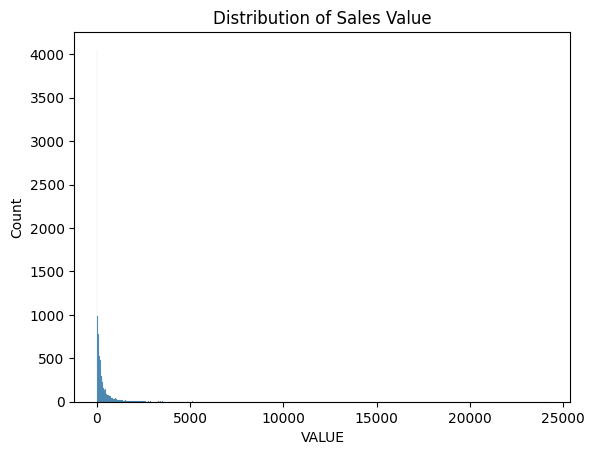

In [13]:
# Distribution of sales value
sns.histplot(df['VALUE'])
plt.title('Distribution of Sales Value')
plt.show()

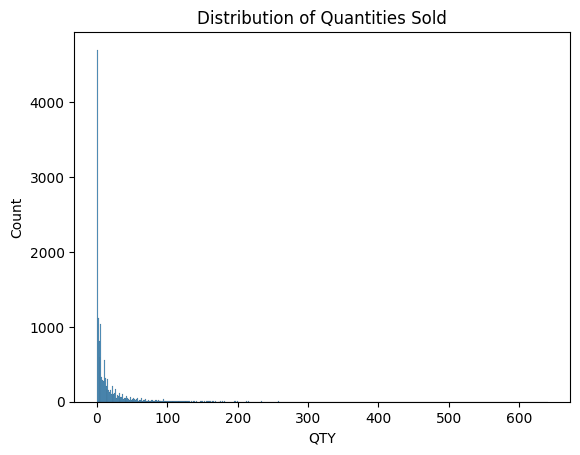

In [14]:
# Distribution of quantities sold
sns.histplot(df['QTY'])
plt.title('Distribution of Quantities Sold')
plt.show()

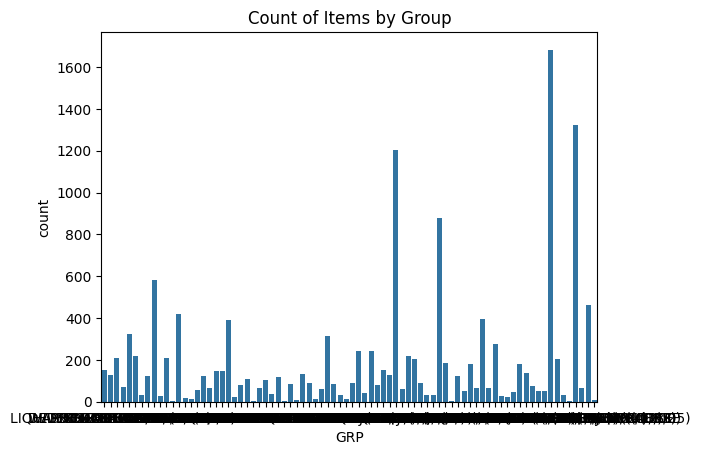

In [15]:
# Countplot for GROUP
sns.countplot(data=df, x='GRP')
plt.title('Count of Items by Group')
plt.show()

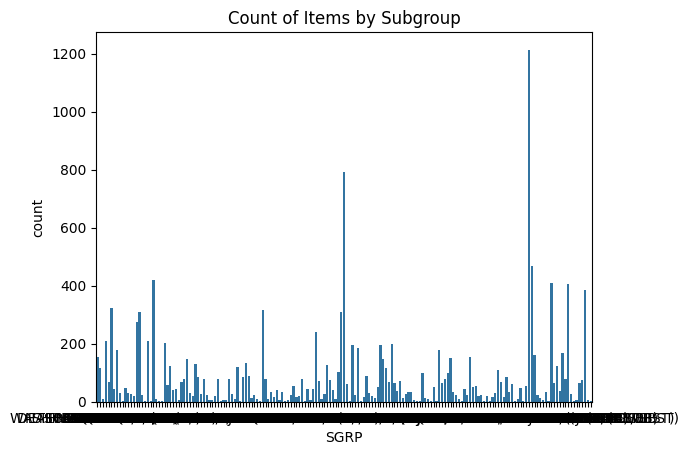

In [16]:
# Countplot for SUBGROUP
sns.countplot(data=df, x='SGRP')
plt.title('Count of Items by Subgroup')
plt.show()

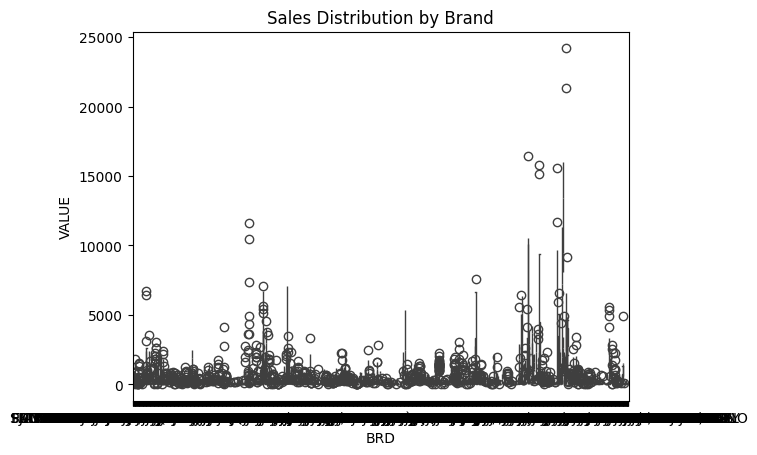

In [17]:
# Sales distribution by Brand
sns.boxplot(data=df, x='BRD', y='VALUE')
plt.title('Sales Distribution by Brand')
plt.show()

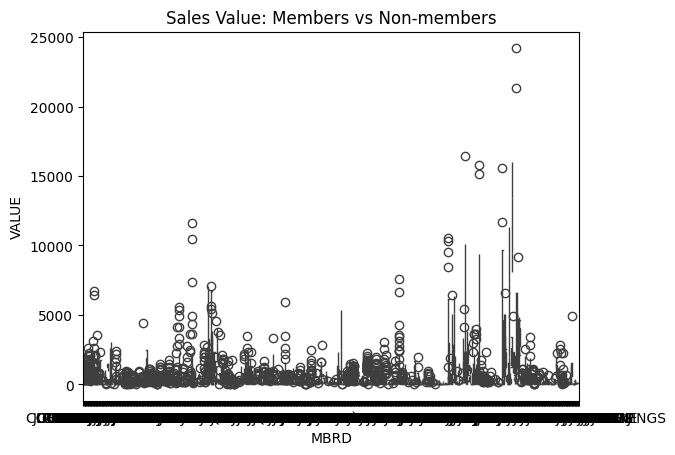

In [18]:
# Sales comparison between Members and Non-members
sns.boxplot(data=df, x='MBRD', y='VALUE')
plt.title('Sales Value: Members vs Non-members')
plt.show()

Convert all the column values from categorical to numerical

In [22]:
#convert month column from string to float
df['MONTH_FLOAT'] = df['MONTH'].str.extract('(\d+)').astype(float)

In [30]:
# Extract the numerical part of STORECODE and convert to float
df['STORECODE'] = df['STORECODE'].str.extract('(\d+)').astype(float)

In [31]:
df.columns

Index(['MONTH_FLOAT', 'STORECODE', 'QTY', 'VALUE', 'GRP', 'SGRP', 'SSGRP',
       'CMP', 'MBRD', 'BRD'],
      dtype='object')

In [32]:
df['MONTH_FLOAT']

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
14255    3.0
14256    3.0
14257    1.0
14258    1.0
14259    1.0
Name: MONTH_FLOAT, Length: 14260, dtype: float64

In [25]:
# Remove the original MONTH column
df.drop(columns=['MONTH'], inplace=True)

In [33]:
df.columns

Index(['MONTH_FLOAT', 'STORECODE', 'QTY', 'VALUE', 'GRP', 'SGRP', 'SSGRP',
       'CMP', 'MBRD', 'BRD'],
      dtype='object')

In [34]:
# Reorder columns to place MONTH_FLOAT at the first index
cols = ['MONTH_FLOAT'] + [col for col in df.columns if col != 'MONTH_FLOAT']
df = df[cols]

In [35]:
df['STORECODE']

0         1.0
1         1.0
2         1.0
3         1.0
4         2.0
         ... 
14255    10.0
14256     8.0
14257     6.0
14258    10.0
14259     8.0
Name: STORECODE, Length: 14260, dtype: float64

Label Encoders - for converting categorical values to numerical values

In [42]:
# Identify categorical columns
categorical_columns = ['GRP', 'SGRP', 'SSGRP', 'CMP','MBRD', 'BRD']

In [43]:
#import labelencoder
from sklearn.preprocessing import LabelEncoder

In [44]:
# Initialize LabelEncoder
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [45]:
df.head()

,MONTH_FLOAT,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,1.0,1.0,25,83,34,70,92,174,181,364
1,1.0,1.0,6,22,34,70,92,174,181,365
2,1.0,1.0,4,15,34,70,92,174,181,368
3,1.0,1.0,15,60,34,70,92,245,233,476
4,1.0,2.0,0,0,34,70,92,174,126,236


Correlation matrix

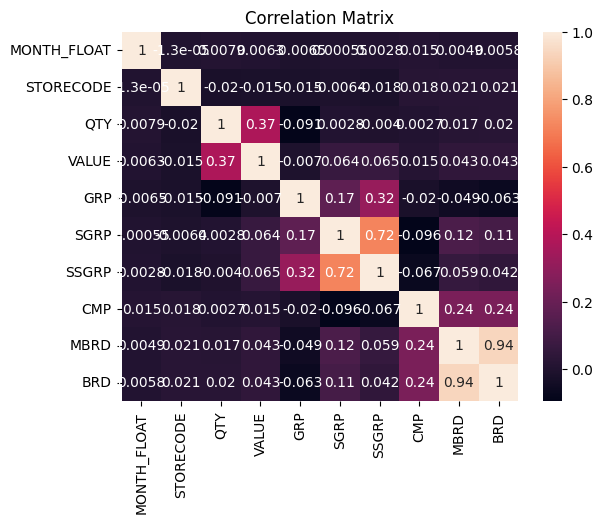

In [46]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

Pivot table for Monthly Sales by Store

In [51]:
monthly_sales = pd.pivot_table(df, values='VALUE', index='MONTH_FLOAT', columns='STORECODE', aggfunc='sum')
monthly_sales


STORECODE,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
MONTH_FLOAT,,,,,,,,,,
1.0,113641,106904,153630,161620,115460,140393,179999,237162,86810,93637
2.0,119674,85250,135913,159756,110759,188734,215617,190232,118122,89481
3.0,101395,91870,139007,150190,108867,173500,175520,244594,108494,102702


Text(0.5, 1.0, 'Monthly Sales Value')

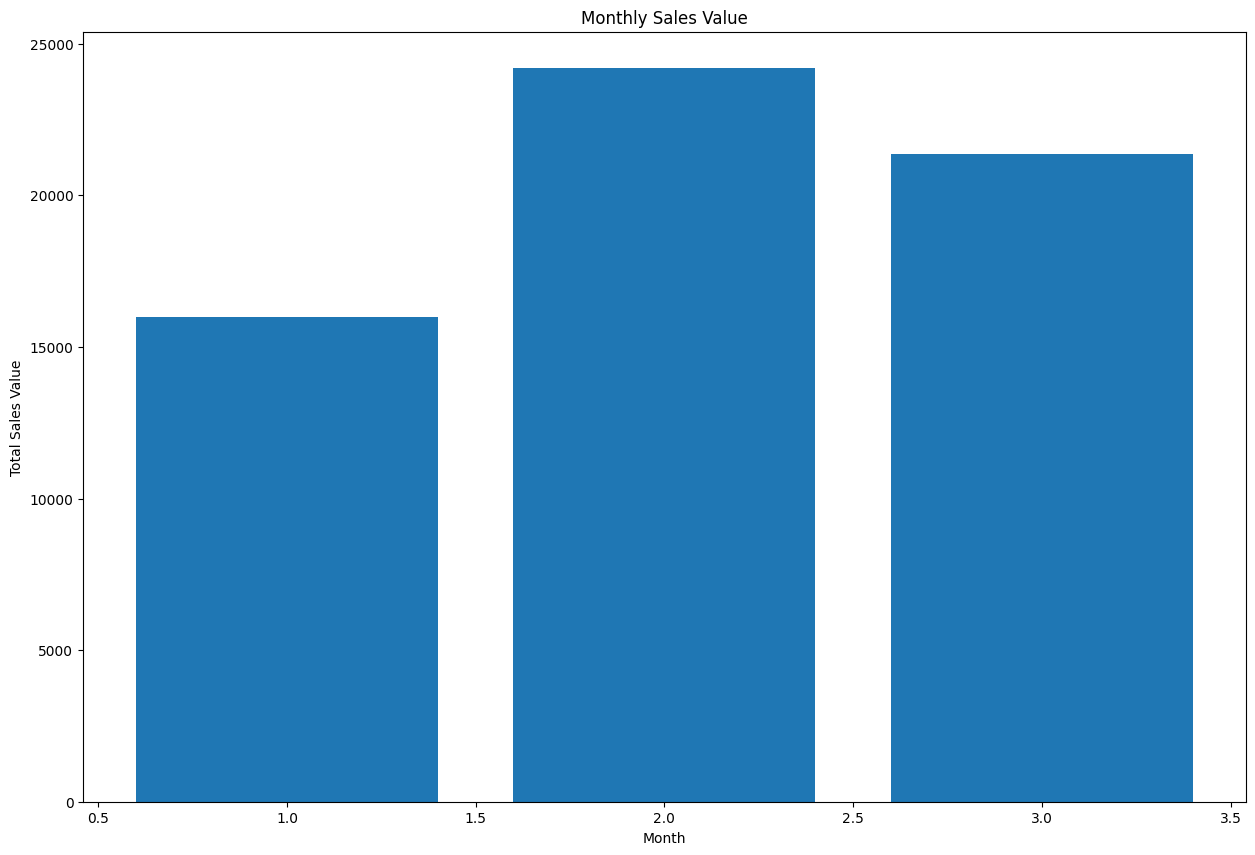

In [58]:
plt.figure(figsize=(15,10))
plt.bar(df.MONTH_FLOAT,df.VALUE)
plt.xlabel('Month')
plt.ylabel('Total Sales Value')
plt.title('Monthly Sales Value')